In [1]:
### Importing all the necessary libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Reszing all the images 
Image_size= [224, 224]
train_path= 'Datasets/Train'
test_path= 'Datasets/Test'

In [5]:
# Importing the ResNet 50 library and adding preprocessing layers to the front pf the ResNet 50
# Using imagenet weights
resnet= ResNet50(input_shape=Image_size + [3], weights='imagenet', include_top=False)

In [6]:
# We dont need to train existing weights
for layer in resnet.layers:
    layer.trainable= False

In [7]:
# Useful for getting number of outputs
folders= glob('Datasets/Train/*')

In [8]:
# Adding our own layer
x= Flatten()(resnet.output)

In [9]:
prediction= Dense(len(folders), activation='softmax')(x)

# Create a model object
model= Model(inputs= resnet.input, outputs= prediction)

In [10]:
# Model Summary
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
# Cost and optimization method to use
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [16]:
# Using image data generator to import images from the dataset

train_datagen= ImageDataGenerator(rescale= 1./255, 
                                  shear_range= 0.2,
                                  zoom_range=0.3,
                                  horizontal_flip= True)

test_datagen= ImageDataGenerator(rescale= 1./255)

In [17]:
training_set= train_datagen.flow_from_directory('Datasets/Train', 
                                                target_size=(224, 224), 
                                                batch_size=32, 
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [18]:
testing_set= test_datagen.flow_from_directory('Datasets/Test', 
                                                target_size=(224, 224), 
                                                batch_size=32, 
                                                class_mode='categorical')

Found 58 images belonging to 3 classes.


In [20]:
# Fitting the model
r= model.fit_generator(training_set, 
                       validation_data=testing_set, 
                       epochs=100, 
                       steps_per_epoch= len(training_set), 
                       validation_steps=len(testing_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 [==============================] - 9s 5s/step - loss: 7.8335 - accuracy: 0.3281 - val_loss: 9.1015 - val_accuracy: 0.1552
Epoch 2/100
2/2 [==============================] - 7s 3s/step - loss: 4.8226 - accuracy: 0.4062 - val_loss: 3.8243 - val_accuracy: 0.5172
Epoch 3/100
2/2 [==============================] - 7s 3s/step - loss: 6.2901 - accuracy: 0.3906 - val_loss: 5.0637 - val_accuracy: 0.3276
Epoch 4/100
2/2 [==============================] - 7s 4s/step - loss: 6.6390 - accuracy: 0.3906 - val_loss: 1.8558 - val_accuracy: 0.5517
Epoch 5/100
2/2 [==============================] - 7s 4s/step - loss: 2.0883 - accuracy: 0.4688 - val_loss: 4.3758 - val_accuracy: 0.1552
Epoch 6/100
2/2 [==============================] - 7s 4s/step - loss: 4.0885 - accuracy: 0.3594 - val_loss: 4.9787 - val_accuracy: 0.1552
Epoch 7/100
2/2 [==============================] - 7s 4s/step - loss: 2.2227 - accuracy: 0.4062 

2/2 [==============================] - 8s 4s/step - loss: 0.2647 - accuracy: 0.9219 - val_loss: 0.8115 - val_accuracy: 0.7414
Epoch 59/100
2/2 [==============================] - 8s 4s/step - loss: 0.2002 - accuracy: 0.9531 - val_loss: 0.8189 - val_accuracy: 0.7414
Epoch 60/100
2/2 [==============================] - 7s 4s/step - loss: 0.1951 - accuracy: 0.9688 - val_loss: 0.8052 - val_accuracy: 0.7759
Epoch 61/100
2/2 [==============================] - 8s 4s/step - loss: 0.1954 - accuracy: 0.9688 - val_loss: 0.8069 - val_accuracy: 0.7241
Epoch 62/100
2/2 [==============================] - 8s 4s/step - loss: 0.1994 - accuracy: 0.9688 - val_loss: 0.8754 - val_accuracy: 0.6897
Epoch 63/100
2/2 [==============================] - 8s 4s/step - loss: 0.2238 - accuracy: 0.9531 - val_loss: 0.8094 - val_accuracy: 0.7414
Epoch 64/100
2/2 [==============================] - 8s 4s/step - loss: 0.2926 - accuracy: 0.8594 - val_loss: 0.7974 - val_accuracy: 0.7759
Epoch 65/100
2/2 [======================

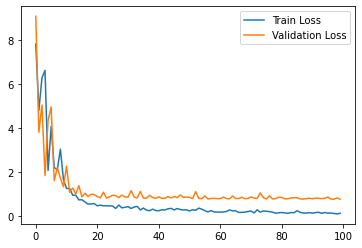

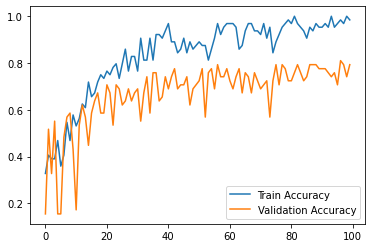

<Figure size 432x288 with 0 Axes>

In [21]:
# Plotting the loss
plt.plot(r.history['loss'], label= 'Train Loss')
plt.plot(r.history['val_loss'], label= 'Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal loss')

# Plotting the accuracy
plt.plot(r.history['accuracy'], label= 'Train Accuracy')
plt.plot(r.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# Saving as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [33]:
##################################################################################################

In [25]:
y_pred= model.predict(testing_set)

In [26]:
y_pred

array([[5.00570633e-04, 9.97531295e-01, 1.96820078e-03],
       [3.02590430e-04, 9.97167766e-01, 2.52964743e-03],
       [6.69296503e-01, 1.95209622e-01, 1.35493815e-01],
       [2.90184878e-02, 7.54532635e-01, 2.16448799e-01],
       [9.93765235e-01, 4.19617305e-03, 2.03860039e-03],
       [1.04534375e-02, 9.48636413e-01, 4.09100391e-02],
       [3.86091799e-01, 7.15873539e-02, 5.42320788e-01],
       [1.36393812e-02, 6.88281894e-01, 2.98078805e-01],
       [3.26509215e-02, 7.21541107e-01, 2.45808020e-01],
       [6.21556342e-01, 1.69916213e-01, 2.08527461e-01],
       [4.19329628e-02, 7.93756545e-02, 8.78691375e-01],
       [9.30637866e-03, 9.06345963e-01, 8.43477398e-02],
       [1.01369224e-01, 1.17598191e-01, 7.81032503e-01],
       [1.09395638e-01, 7.76435196e-01, 1.14169143e-01],
       [3.54141858e-03, 7.06133008e-01, 2.90325582e-01],
       [2.15077944e-05, 3.37100588e-04, 9.99641418e-01],
       [1.90351605e-01, 6.61212742e-01, 1.48435682e-01],
       [2.99977628e-03, 2.42004

In [27]:
y_pred= np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1], dtype=int64)

In [29]:
model= load_model('model_resnet50.h5')

In [57]:
img= image.load_img('Datasets/Test/audi/26.jpg', target_size=(224, 224))

In [58]:
x= image.img_to_array(img)
x

array([[[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 34.,  44.,  54.],
        [ 34.,  44.,  54.],
        [ 34.,  44.,  54.]],

       [[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 23.,  33.,  43.],
        [ 23.,  33.,  43.],
        [ 23.,  33.,  43.]],

       [[ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        [ 38.,  44.,  58.],
        ...,
        [ 18.,  28.,  38.],
        [ 18.,  28.,  38.],
        [ 18.,  28.,  38.]],

       ...,

       [[228., 223., 220.],
        [228., 223., 220.],
        [228., 223., 220.],
        ...,
        [239., 239., 241.],
        [239., 239., 241.],
        [239., 239., 241.]],

       [[227., 222., 219.],
        [227., 222., 219.],
        [227., 222., 219.],
        ...,
        [238., 238., 240.],
        [238., 238., 240.],
        [238., 238., 240.]],

       [[228., 223., 220.],
        [228., 223., 220.],
        [228., 2

In [59]:
x.shape

(224, 224, 3)

In [60]:
x=x/255
x

array([[[0.14901961, 0.17254902, 0.22745098],
        [0.14901961, 0.17254902, 0.22745098],
        [0.14901961, 0.17254902, 0.22745098],
        ...,
        [0.13333334, 0.17254902, 0.21176471],
        [0.13333334, 0.17254902, 0.21176471],
        [0.13333334, 0.17254902, 0.21176471]],

       [[0.14901961, 0.17254902, 0.22745098],
        [0.14901961, 0.17254902, 0.22745098],
        [0.14901961, 0.17254902, 0.22745098],
        ...,
        [0.09019608, 0.12941177, 0.16862746],
        [0.09019608, 0.12941177, 0.16862746],
        [0.09019608, 0.12941177, 0.16862746]],

       [[0.14901961, 0.17254902, 0.22745098],
        [0.14901961, 0.17254902, 0.22745098],
        [0.14901961, 0.17254902, 0.22745098],
        ...,
        [0.07058824, 0.10980392, 0.14901961],
        [0.07058824, 0.10980392, 0.14901961],
        [0.07058824, 0.10980392, 0.14901961]],

       ...,

       [[0.89411765, 0.8745098 , 0.8627451 ],
        [0.89411765, 0.8745098 , 0.8627451 ],
        [0.89411765, 0

In [61]:
x= np.expand_dims(x, axis=0)
img_data= preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [62]:
model.predict(img_data)

array([[5.7884515e-03, 1.5303760e-04, 9.9405849e-01]], dtype=float32)

In [63]:
a=np.argmax(model.predict(img_data), axis=1)

In [64]:
a

array([2], dtype=int64)